# 範例重點
學會從 Keras 內建函式取得資料 <br />
能夠建立簡易的深度學習模型<br />
觀察並了解 Overfit 現象<br />

In [3]:
import os
import keras

os.environ["CUD_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [5]:
train, test = keras.datasets.cifar10.load_data()

In [6]:
x_train, y_train = train
x_test, y_test = test

x_train = x_train/255.0
x_test = x_test/255.0

print(x_train.shape)
print(x_test.shape)

x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

print(x_train.shape)
print(x_test.shape)

y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 3072)
(10000, 3072)


In [5]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units = 512, activation = 'relu')(input_layer)
    x = keras.layers.Dense(units = 256, activation = 'relu')(x)
    x = keras.layers.Dense(units = 128, activation = 'relu')(x)
    out = keras.layers.Dense(units = 10, activation = 'softmax')(x)
    
    model = keras.models.Model(inputs = [input_layer], outputs = [out])
    return model

In [6]:
model = build_mlp()
print(model.summary())

optimizer = keras.optimizers.Adam(lr = 0.001)
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
None


In [7]:
history = model.fit(x_train,y_train, epochs = 100,
                             batch_size = 256,
                             validation_data = (x_test, y_test),
                             shuffle = True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 13s 268us/step - loss: 1.9123 - acc: 0.3092 - val_loss: 1.7260 - val_acc: 0.3786
Epoch 2/100
50000/50000 [==============================] - 11s 229us/step - loss: 1.7051 - acc: 0.3877 - val_loss: 1.6975 - val_acc: 0.3912
Epoch 3/100
50000/50000 [==============================] - 12s 231us/step - loss: 1.6104 - acc: 0.4234 - val_loss: 1.5614 - val_acc: 0.4466
Epoch 4/100
50000/50000 [==============================] - 11s 227us/step - loss: 1.5457 - acc: 0.4475 - val_loss: 1.5278 - val_acc: 0.4547
Epoch 5/100
50000/50000 [==============================] - 12s 238us/step - loss: 1.5006 - acc: 0.4631 - val_loss: 1.5439 - val_acc: 0.4479
Epoch 6/100
50000/50000 [==============================] - 12s 246us/step - loss: 1.4653 - acc: 0.4766 - val_loss: 1.4993 - val_acc: 0.4714
Epoch 7/100
50000/50000 [==============================] - 12s

Epoch 57/100
50000/50000 [==============================] - 11s 215us/step - loss: 0.5245 - acc: 0.8132 - val_loss: 2.0135 - val_acc: 0.5149
Epoch 58/100
50000/50000 [==============================] - 11s 217us/step - loss: 0.5051 - acc: 0.8213 - val_loss: 2.0330 - val_acc: 0.5112
Epoch 59/100
50000/50000 [==============================] - 11s 217us/step - loss: 0.5007 - acc: 0.8211 - val_loss: 2.0679 - val_acc: 0.5122
Epoch 60/100
50000/50000 [==============================] - 11s 220us/step - loss: 0.4900 - acc: 0.8242 - val_loss: 2.0501 - val_acc: 0.5151
Epoch 61/100
50000/50000 [==============================] - 11s 224us/step - loss: 0.4736 - acc: 0.8307 - val_loss: 2.1398 - val_acc: 0.5042
Epoch 62/100
50000/50000 [==============================] - 11s 219us/step - loss: 0.4752 - acc: 0.8325 - val_loss: 2.1674 - val_acc: 0.5172
Epoch 63/100
50000/50000 [==============================] - 11s 225us/step - loss: 0.4696 - acc: 0.8332 - val_loss: 2.1698 - val_acc: 0.5097
Epoch 64/100


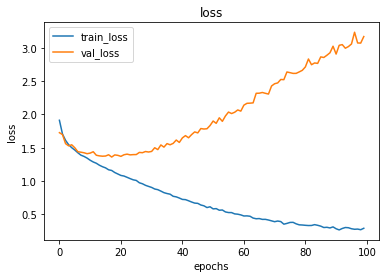

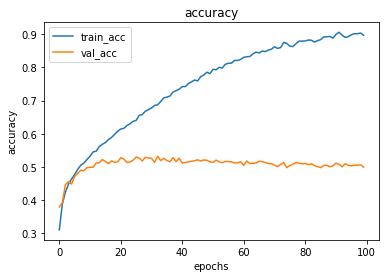

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title('loss')
plt.show()

plt.plot(history.history['acc'], label = 'train_acc')
plt.plot(history.history['val_acc'], label = 'val_acc')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.title('accuracy')
plt.show()

# Homework
請將 Epoch 加到 500 個，並觀察 learning curve 的走勢 <br />
請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢 <br />

In [8]:
train, test = keras.datasets.cifar10.load_data()
x_train, y_train = train
x_test, y_test = test

x_train = x_train/255.0
x_test = x_test/255.0

print(x_train.shape)
print(x_test.shape)

y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [13]:
def build_model():
    input_layer = keras.layers.Input([32,32,3])
    x = keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'relu')(input_layer)
    x = keras.layers.MaxPooling2D(pool_size=(2,2))(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(units = 64, activation = 'relu')(x)
    x = keras.layers.BatchNormalization()(x)
    output_layer = keras.layers.Dense(units = 10, activation = 'softmax')(x)
    
    model = keras.models.Model(inputs = [input_layer], outputs = [output_layer])
    return model

In [16]:
model = build_model()
model.compile(optimizer = 'SGD', loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
flatten_5 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                1048640   
_________________________________________________________________
batch_normalization_10 (Batc (None, 64)                256       
__________

In [17]:
#My notebook cant handle 500 epochs, so I just do 200 times
history = model.fit(x_train, y_train, epochs = 200, batch_size = 256, validation_data = (x_test, y_test), shuffle = True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/200
 6912/50000 [===>..........................] - ETA: 1:20 - loss: 2.0206 - acc: 0.3071

KeyboardInterrupt: 

In [ ]:

plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title('loss')
plt.show()

plt.plot(history.history['acc'], label = 'train_acc')
plt.plot(history.history['val_acc'], label = 'val_acc')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.title('accuracy')
plt.show()